###  1.Sobel Operator

#### Sample
![](./img/thresh-x-example.png)


#### Examples of Useful Code

You need to pass a **`single color channel`** to the cv2.Sobel() function, so first convert it to grayscale:

`gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)`

Note: Make sure you use the correct grayscale conversion depending on how you've read in your images. Use **`cv2.COLOR_RGB2GRAY`** if you've read in an image using **`mpimg.imread()`**. Use **`cv2.COLOR_BGR2GRAY`** if you've read in an image using **`cv2.imread()`**.

1.Calculate the derivative in the x direction (the `1, 0 at the end denotes x direction`):

`sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)`

2.Calculate the derivative in the y direction (the` 0, 1 at the end denotes y direction`):

`sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)`

3.Calculate the absolute value of the x derivative:

`abs_sobelx = np.absolute(sobelx)`

4.Convert the absolute value image to 8-bit:

`scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))`

Note: It's not entirely necessary to convert to 8-bit (range from 0 to 255) but in practice, it can be useful in the event that you've written a function to apply a particular threshold, and you want it to work the same on input images of different scales, like jpg vs. png. You could just as well choose a different standard range of values, like 0 to 1 etc.

5.Create a binary threshold to select pixels based on gradient strength:

`thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')`


### 2.Applying Sobel
#### Example
![](./img/thresh-x-example.png)

Here's the scaffolding for your function:

In [ ]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Grayscale
    # Apply cv2.Sobel()
    # Take the absolute value of the output from cv2.Sobel()
    # Scale the result to an 8-bit range (0-255)
    # Apply lower and upper thresholds
    # Create binary_output
    return binary_output


Pass in `img` and set the parameter `orient` as `'x'` or `'y'` to take either the ${x}$ or ${y}$ gradient. Set `thresh_min`, and `thresh_max` to specify the range to select for `binary output`. You can use exclusive (`<, >`) or inclusive (`<=, >=`) thresholding.

**NOTE:** Your output should be an array of the same size as the input image. The output array elements should be `1` where gradients were in the threshold range, and `0` everywhere else.

As usual, if you run into any *errors* as you run your code, please refer to the **Examples of Useful Code** section in the previous video and make sure that your code syntax matches up! You can download the image used in the quiz [here](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/files/Advanced_Lane_Finding_Images/sobel_example/signs_vehicles_xygrad.png).

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [30]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=20, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    
    #1 Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#cv2.imread()
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)#mpimg.imread()
    
    #2 Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    
    if orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    #3 Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    
    #4 Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    #5 Create a mask of 1's where the scaled gradient magnitude
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    #6 Return this mask as your binary_output image
#     binary_output = np.copy(img) # Remove this line
    binary_output = sxbinary
    return binary_output


Run the function

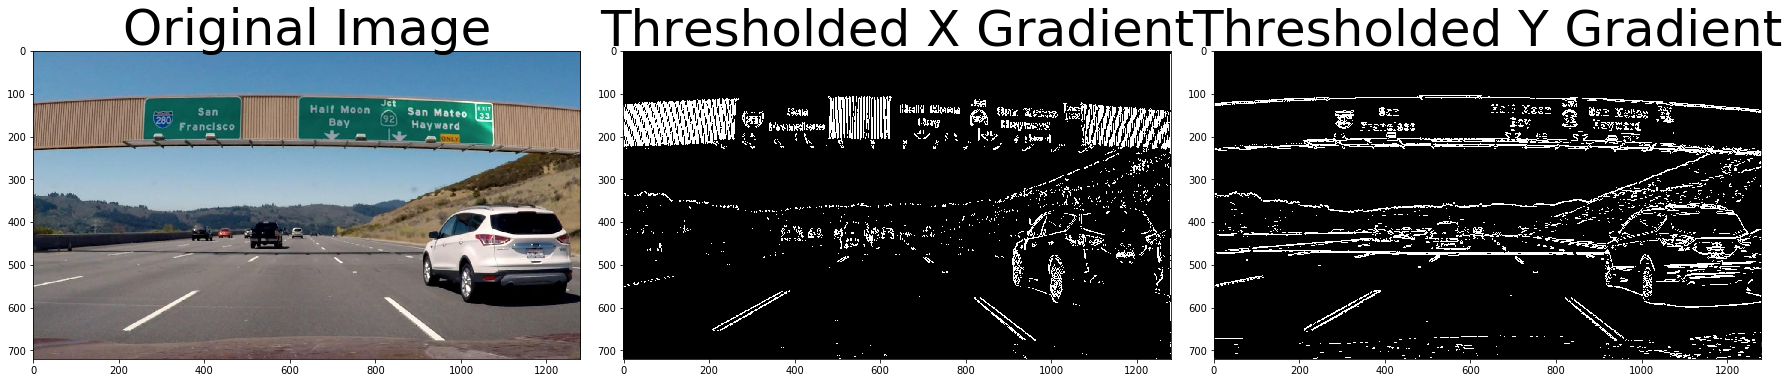

In [32]:
# Run the function
# image = cv2.imread("signs_vehicles_xygrad.png")#
image = mpimg.imread("signs_vehicles_xygrad.png")
grad_binaryX = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
grad_binaryY = abs_sobel_thresh(image, orient='y', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binaryX, cmap='gray')
ax2.set_title('Thresholded X Gradient', fontsize=50)
ax3.imshow(grad_binaryY, cmap='gray')
ax3.set_title('Thresholded Y Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# # Plot the result
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
# f.tight_layout()
# ax1.imshow(image)
# ax1.set_title('Original Image', fontsize=50)
# ax2.imshow(grad_binaryY, cmap='gray')
# ax2.set_title('Thresholded Y Gradient', fontsize=50)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### 3.Magnitude of the Gradient
![](./img/mag-binary.jpg)

With the result of the last quiz, you can now take the gradient in x or y and set thresholds to identify pixels within a certain gradient range. If you play around with the thresholds a bit, you'll find the x-gradient does a cleaner job of picking up the lane lines, but you can see the lines in the y-gradient as well.

In this next exercise, your goal is to apply a threshold to the overall magnitude of the gradient, in both x and y.

The magnitude, or absolute value, of the gradient is just the square root of the squares of the individual x and y gradients. For a gradient in both the ${x}$ **and** ${y}$ directions, the magnitude is the square root of the sum of the squares.

abs_sobelx${= \sqrt{(sobel_x)^2}}$

abs_sobely${= \sqrt{(sobel_y)^2}}$

abs_sobelxy${= \sqrt{(sobel_x)^2+(sobel_y)^2}}$

It's also worth considering the size of the region in the image over which you'll be taking the gradient. You can modify the kernel size for the Sobel operator to change the size of this region. Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. The default Sobel kernel size is 3, but here you'll define a new function that takes kernel size as a parameter.

It's important to note here that the kernel size should be an **odd** number. Since we are searching for the gradient around a given pixel, we want to have an equal number of pixels in each direction of the region from this central pixel, leading to an odd-numbered filter size - a filter of size three has the central pixel with one additional pixel in each direction, while a filter of size five has an additional two pixels outward from the central pixel in each direction.

The function you'll define for the exercise below should take in an image and optional Sobel kernel size, as well as thresholds for gradient magnitude. Next, you'll compute the gradient magnitude, apply a threshold, and create a binary output image showing where thresholds were met.

#### Steps to take in this exercise:

1.  Fill out the function in the editor below to return a thresholded gradient magnitude. Again, you can apply exclusive (`<, >`) or inclusive (`<=, >=`) thresholds.
2.  Test that your function returns output similar to the example below for `sobel_kernel=9, mag_thresh=(30, 100)`.

You can download the image used in the quiz [here](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/files/Advanced_Lane_Finding_Images/sobel_example/signs_vehicles_xygrad.png).

#### Here's an example of the output you're going for:
![](thresh-mag-example.png)


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [29]:
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Calculate the magnitude 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    #1 Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    #2 Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    #3 Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)

    #4 Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 

    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    
    #5 Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)

    x = (gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])
#     print(x)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    
#     binary_output = np.copy(img) # Remove this line
    return binary_output
    

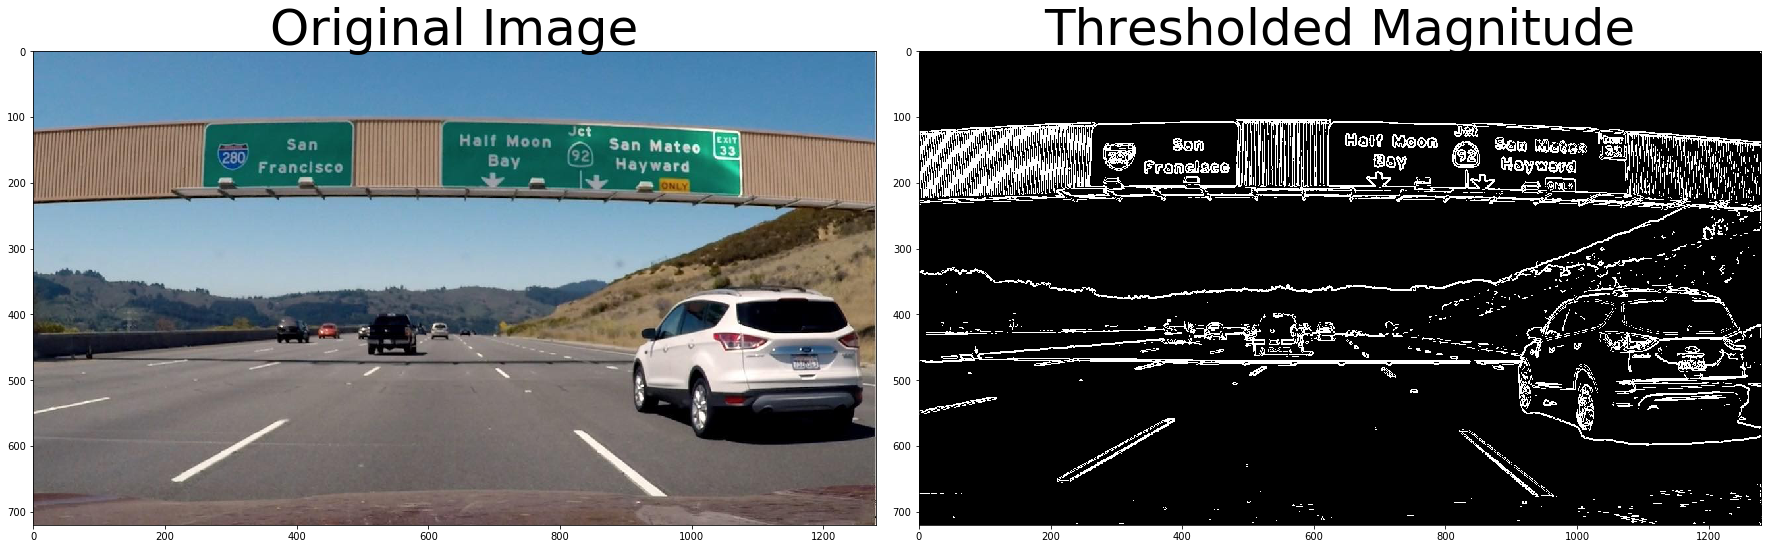

In [30]:
# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 4.Direction of the Gradient

When you play around with the thresholding for the gradient magnitude in the previous exercise, you find what you might expect, namely, that it picks up the lane lines well, but with a lot of other stuff detected too. Gradient magnitude is at the heart of Canny edge detection, and is why Canny works well for picking up all edges.

`In the case of lane lines, we're interested only in edges of a particular orientation`. So now we will explore the direction, or orientation, of the gradient.

The direction of the gradient is simply the inverse tangent (arctangent) of the ${y}$ gradient divided by the ${x}$ gradient:

${arctan{(sobel_y/sobel_x)}}$.

Each pixel of the resulting image contains a value for the angle of the gradient away from horizontal in units of radians, covering a range of ${-\pi/2}$ to ${\pi/2}$. An orientation of 0 implies a vertical line and orientations of ${{+/-}{\pi/2}}$ imply horizontal lines. (Note that in the quiz below, we actually utilize(运用,利用,应用) `np.arctan2`, which can return values between ${{+/-}{\pi}}$; however, as we'll take the absolute value of ${sobel_x}$, this restricts the values to ${{+/-}{\pi/2}}$, as shown [here](https://en.wikipedia.org/wiki/Atan2).)

In this next exercise, you'll write a function to compute the direction of the gradient and apply a threshold. The direction of the gradient is much noisier than the gradient magnitude, but you should find that you can pick out particular features by orientation.

#### Steps to take in this exercise:

1.  Fill out the function in the editor below to return a thresholded absolute value of the gradient direction. Use Boolean operators, again with exclusive (`<, >`) or inclusive (`<=, >=`) thresholds.
2.  Test that your function returns output similar to the example below for `sobel_kernel=15, thresh=(0.7, 1.3)`.

You can download the image used in the quiz [here](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/files/Advanced_Lane_Finding_Images/sobel_example/signs_vehicles_xygrad.png).

![](./img/thresh-grad-dir-example.jpg)


In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [31]:
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    absgraddir = np.arctan2(abs_sobely, abs_sobelx)
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(absgraddir)
    
    # 6) Return this mask as your binary_output image
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    
    
#     binary_output = np.copy(img) # Remove this line
    return binary_output
    

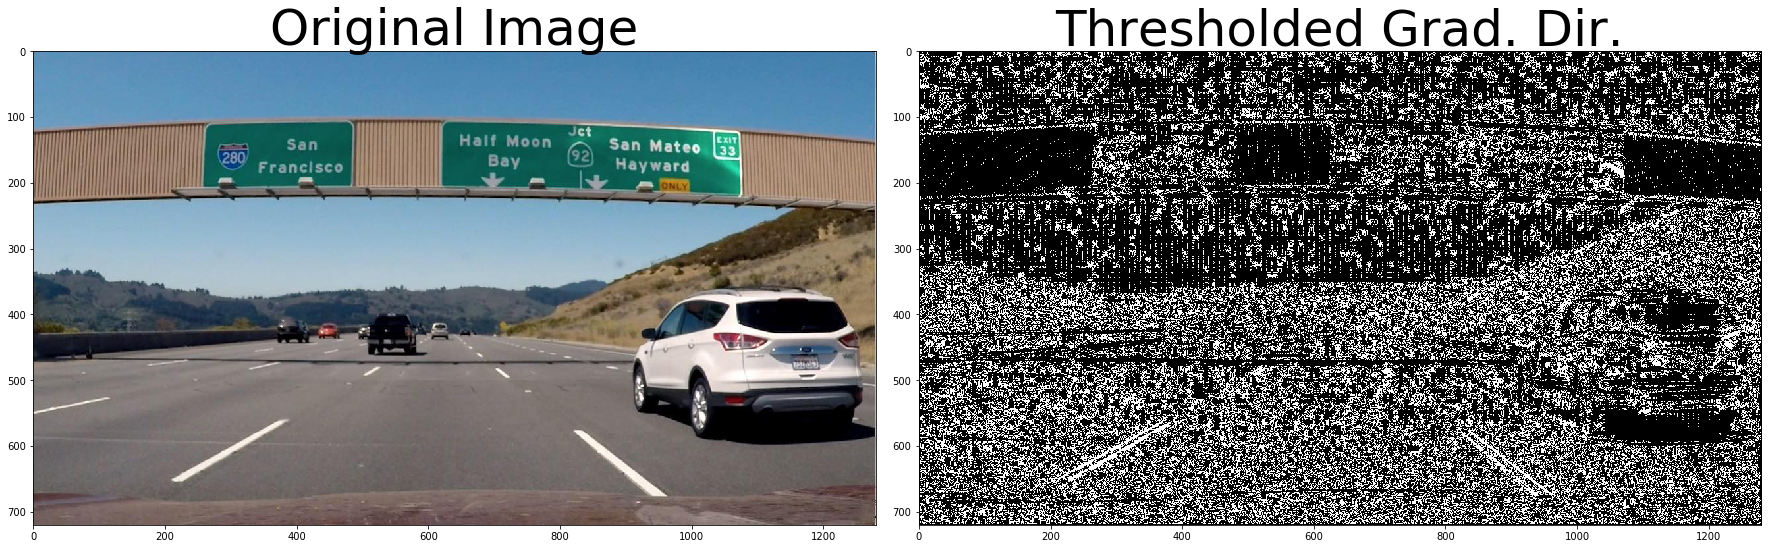

In [32]:
# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### 5.Combining Thresholds

If you play around with the thresholds in the last exercise, you'll find that you can start to identify the lane lines by gradient direction alone by setting the threshold around `thresh = (0.7, 1.3)`, but there's still a lot of noise in the resulting image.

Now consider how you can use various aspects of your gradient measurements (x, y, magnitude, direction) to isolate(使(某物质、细胞等)分离;使离析) lane-line pixels. Specifically, think about how you can use thresholds of the `x and y gradients`, the overall `gradient magnitude`, and the `gradient direction` to focus on pixels that are likely to be part of the lane lines.

#### Challenge:

In the project at the end of this section, you'll want to experiment with thresholding various aspects of the gradient, so now would be a great time to start coding it up on your local machine! Grab the image we've been working with for the last three quizzes [here](https://s3.amazonaws.com/udacity-sdc/advanced_lane_finding/signs_vehicles_xygrad.png) (or a smaller jpg file [here](https://s3.amazonaws.com/udacity-sdc/advanced_lane_finding/signs_vehicles_xygrad.jpg)).

Combine the selection thresholds from the last 3 quizzes to write a piece of code like the following, where you can play with various thresholds and see the output.


In [24]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, sobel_kernel)
    
    if orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, sobel_kernel)
    
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scale_factor = np.max(abs_sobel)/255
    scaled_sobel = np.uint8(abs_sobel/scale_factor)
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    
    # 6) Return this mask as your grad_binary image
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    
    #1 Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    #2 Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, sobel_kernel)
    
    #3 Calculate the gradient magnitude
    grad_mag = np.sqrt(sobelx**2, sobely**2)
    
    #4 Rescale to 8 bit
    scale_factor = np.max(grad_mag)/255
    grad_mag = (grad_mag/scale_factor).astype(np.uint8)
    
    #5 Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(grad_mag)
    mag_binary[(grad_mag >= mag_thresh[0]) & (grad_mag <= mag_thresh[1])] = 1
    
    
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    # 1) Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    abs_grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    
    # 5) Create a binary mask where direction thresholds are met
    dir_binary = np.zeros_like(abs_grad_dir)
    
    # 6) Return this mask as your dir_binary image
    dir_binary[(abs_grad_dir >= thresh[0])&(abs_grad_dir <= thresh[1])] = 1
    
    return dir_binary



In [25]:
# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))

grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))

mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))

dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))


Try different combinations and see what you get.

For example, here is a selection for pixels where both the ${x}$ and ${y}$ gradients meet the threshold criteria, or the gradient magnitude and direction are both within their threshold values.

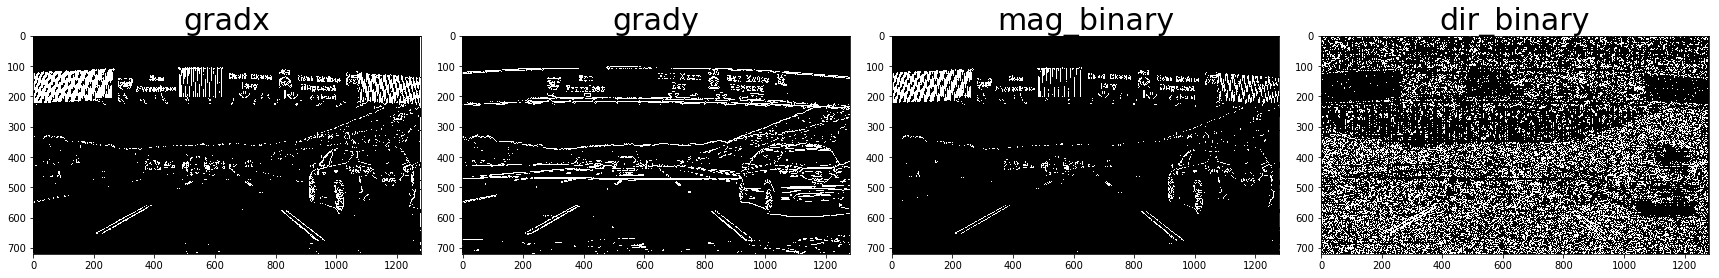

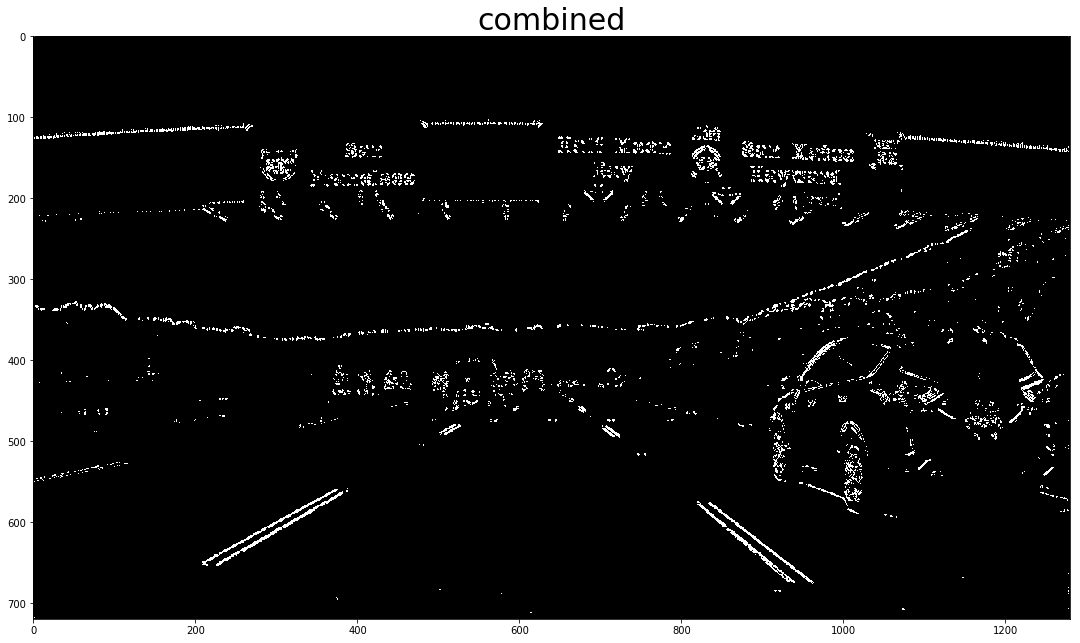

In [28]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1


# Plot the result
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gradx, cmap='gray')
ax1.set_title('gradx', fontsize=30)
ax2.imshow(grady, cmap='gray')
ax2.set_title('grady', fontsize=30)
ax3.imshow(mag_binary, cmap='gray')
ax3.set_title('mag_binary', fontsize=30)
ax4.imshow(dir_binary, cmap='gray')
ax4.set_title('dir_binary', fontsize=30)

f, (ax5) = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax5.imshow(combined, cmap='gray')
ax5.set_title('combined', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


#### Output
Here is an example of a binary result from multiple thresholds:
![](./img/binary-combo-example.jpg)


### 6.Color Thresholding



A **color space** is a specific organization of colors; color spaces provide a way to categorize colors and represent them in digital images.

**RGB** is red-green-blue color space. You can think of this as a 3D space, in this case a cube, where any color can be represented by a 3D coordinate of R, G, and B values. For example, white has the coordinate (255, 255, 255), which has the maximum value for red, green, and blue.

Note: If you read in an image using `matplotlib.image.imread()` you will get an RGB image, but if you read it in using OpenCV `cv2.imread()` this will give you a BGR image.

![](./img/rgb_color_space.png)

There are many other ways to represent the colors in an image besides just composed of red, green, and blue values.

There is also **HSV** color space (hue, saturation, and value), and **HLS** space (hue, lightness, and saturation). These are some of the most commonly used color spaces in image analysis.

To get some intuition about these color spaces, you can generally think of Hue as the value that represents color independent of any change in brightness. So if you imagine a basic red paint color, then add some white to it or some black to make that color lighter or darker -- the underlying color remains the same and the hue for all of these colors will be the same.

On the other hand, **Lightness** and **Value** represent different ways to measure the relative lightness or darkness of a color. For example, a dark red will have a similar hue but much lower value for lightness than a light red. **Saturation** also plays a part in this; saturation is a measurement of colorfulness. So, as colors get lighter and closer to white, they have a lower saturation value, whereas colors that are the most intense, like a bright primary color (imagine a bright red, blue, or yellow), have a high saturation value. You can get a better idea of these values by looking at the 3D color spaces pictured below.

Most of these different color spaces were either inspired by the human vision system, and/or developed for efficient use in television screen displays and computer graphics. You can read more about the history and the derivation of HLS and HSV color spaces [here](https://en.wikipedia.org/wiki/HSL_and_HSV).

![(Left) HSV color space, (Right) HLS color space](./img/hsv_hls_color_spaces.png)

In the code example, I used HLS space to help detect lane lines of different colors and under different lighting conditions.

OpenCV provides a function `hls = cv2.cvtColor(im, cv2.COLOR_RGB2HLS)` that converts images from one color space to another. If you’re interested in the math behind this conversion, take a look at the equations below; note that **all this math is for converting 8-bit images, which is the format for most road images** in this course. These equations convert one color at a time from RGB to HLS.

#### Constants

${V_{max} \leftarrow max(R, G, B)}$

${V_{min} \leftarrow min(R, G, B)}$

These are the maximum and minimum values across all three RGB values for a given color (by pixel).

Note that in these equations, it would be necessary to divide the RGB values by 255 such that they fall in the range (0, 1)(0,1), but OpenCV will perform this for you in `cv2.cvtColor()`. **L and S**  are scaled back up after the transformations take place, while **H** is halved for use in 8-bit images (see below).

#### H channel conversion equations
There are three different equations, which one is used depends on the the value of ${V_{max}}$
​	  whether that's R, G, or B.

${\large H \leftarrow \frac{30(G-B)}{V_{max}-V_{min}}}$, if ${ V_{max}=R}$

${\large H \leftarrow 60 + \frac{30(B-R)}{V_{max}-V_{min}}}$, if ${ V_{max}=G}$

${\large H \leftarrow 120 + \frac{30(R-G)}{V_{max}-V_{min}}}$ , if  ${V_{max}=B}$

Note: In OpenCV, for 8-bit images, the range of H is from 0-179. It's typically from 0-359 for degrees around the cylindrical colorspace, but this number is divided in half so that the range can be represented in an 8-bit image whose color values range from 0-255.

#### L channel conversion equation
${\large L \leftarrow \frac{V_{max}+V_{min}}{2}}$

#### S channel conversion equations
There are two possible equations; one is used depending on the value of L.

${\large S \leftarrow \frac{V_{max}-V_{min}}{V_{max}+V_{min}}}$, if ${L < 0.5}$

${\large S \leftarrow \frac{V_{max}-V_{min}}{2 - (V_{max}+V_{min})}}$, if ${L \geq 0.5}$





### 7.HLS and Color Thresholds
![](test6.jpg)

You've now seen that various color thresholds can be applied to find the lane lines in images. Here we'll explore this a bit further and look at a couple examples to see why a color space like HLS can be more robust. Let's first take another look at some of the images you saw in the last video.

Here I'll read in the same original image (the image above), convert to grayscale, and apply a threshold that identifies the lines:


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

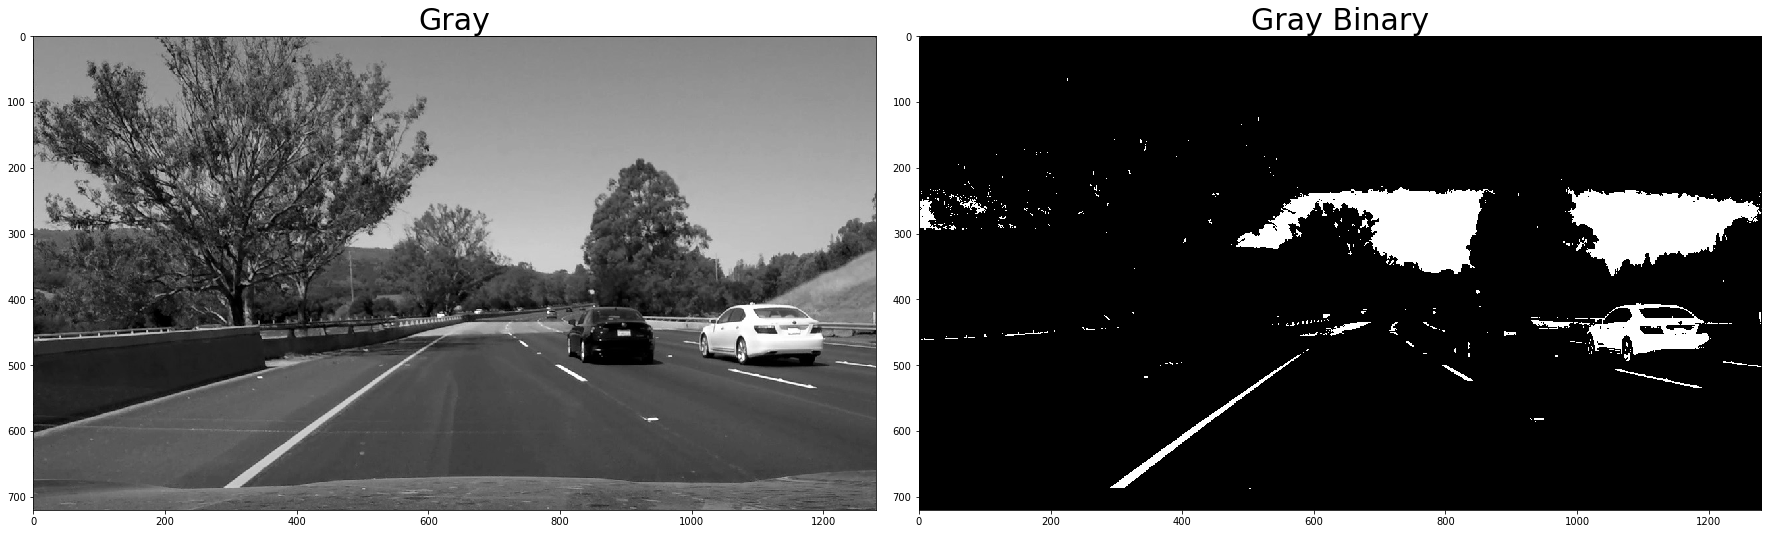

In [35]:
image = mpimg.imread('test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gray, cmap='gray')
ax1.set_title('Gray', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Gray Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

And here's the result:
![](./img/test6gray.jpg)
You might have also explored thresholding individual RGB color channels. You can take a look at them side by side to see which ones do a better job of picking up the lane lines:

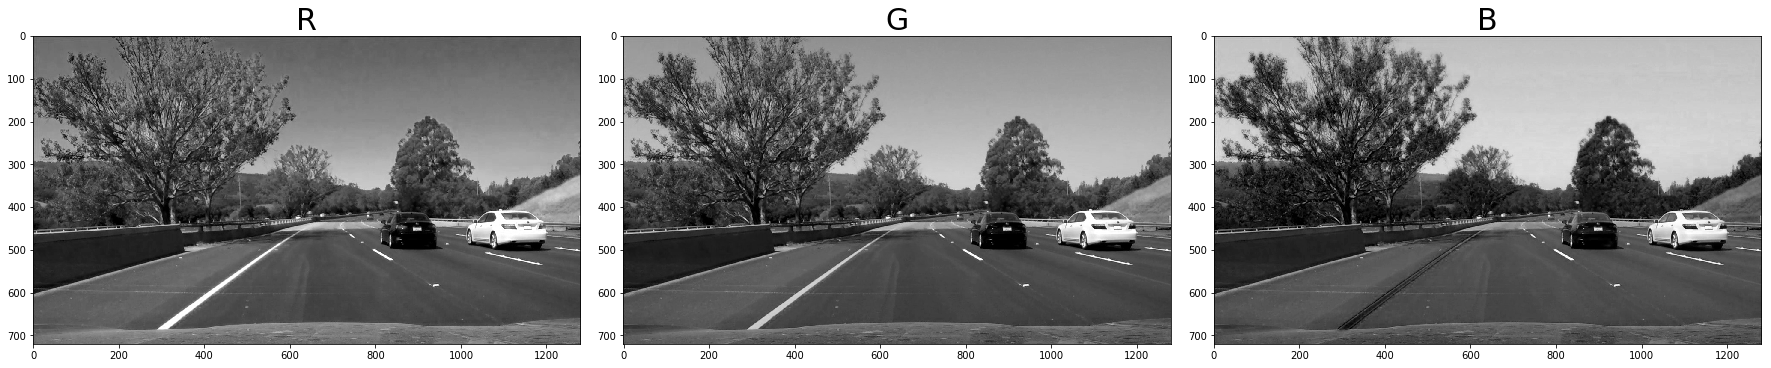

In [37]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))#1行3个24x9大小的子图
f.tight_layout()
ax1.imshow(R, cmap='gray')
ax1.set_title('R', fontsize=30)
ax2.imshow(G, cmap='gray')
ax2.set_title('G', fontsize=30)
ax3.imshow(B, cmap='gray')
ax3.set_title('B', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

The R channel does a reasonable job of highlighting the lines, and you can apply a similar threshold to find lane-line pixels:

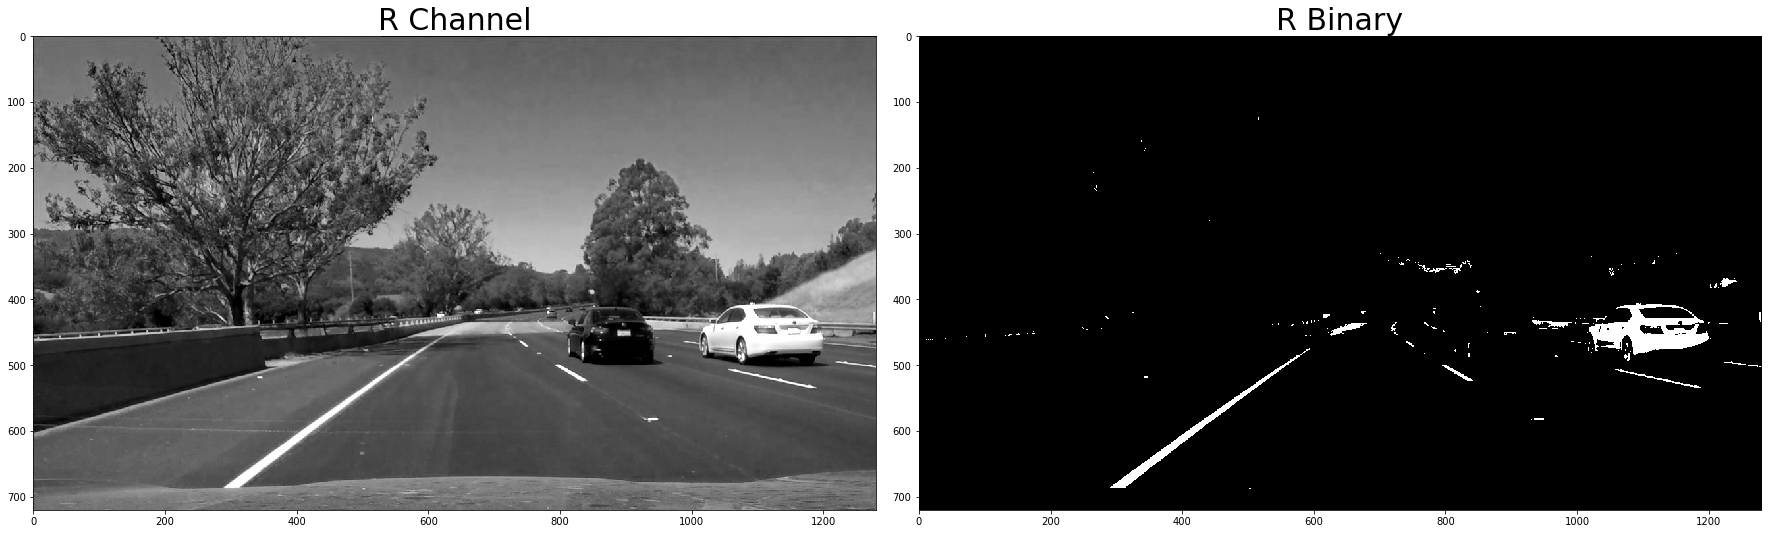

In [41]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(R, cmap='gray')
ax1.set_title('R Channel', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('R Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

We're looking at different color spaces. While there are several that are worth exploring, here we'll look specifically at HLS. When we separate the H, L, and S channels we get the following result:

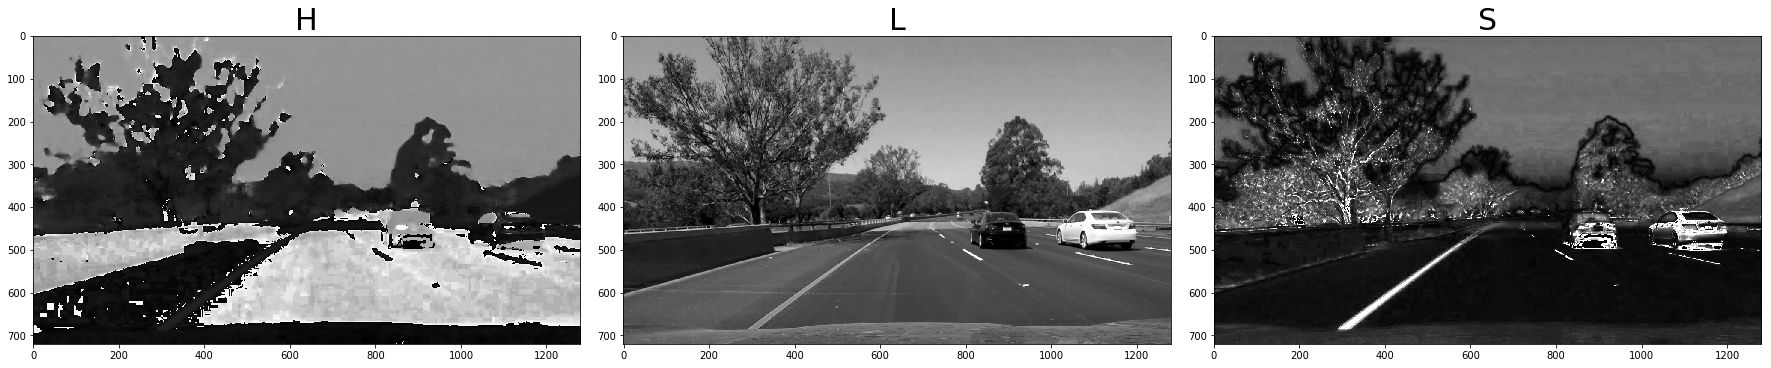

In [42]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))#1行3个24x9大小的子图
f.tight_layout()
ax1.imshow(H, cmap='gray')
ax1.set_title('H', fontsize=30)
ax2.imshow(L, cmap='gray')
ax2.set_title('L', fontsize=30)
ax3.imshow(S, cmap='gray')
ax3.set_title('S', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

The S channel picks up the lines well, so let's try applying a threshold there:

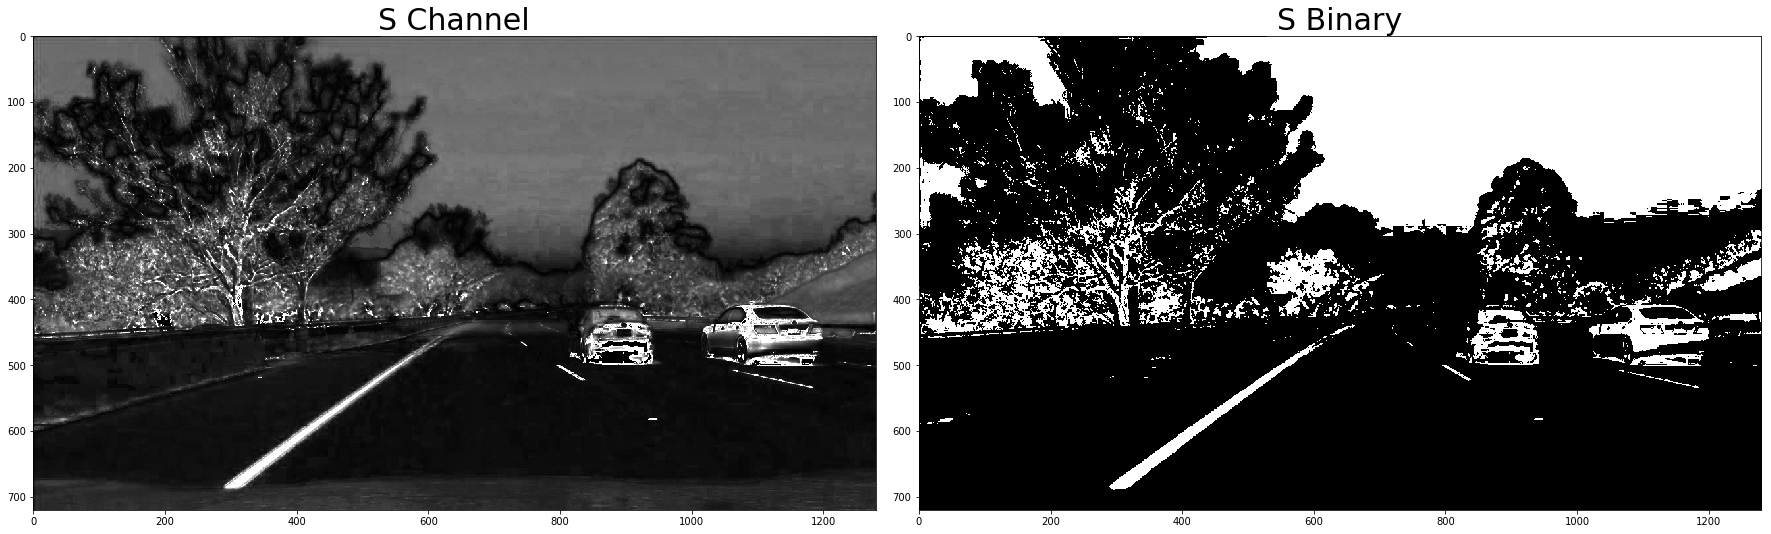

In [43]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(S, cmap='gray')
ax1.set_title('S Channel', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('S Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

You can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result:

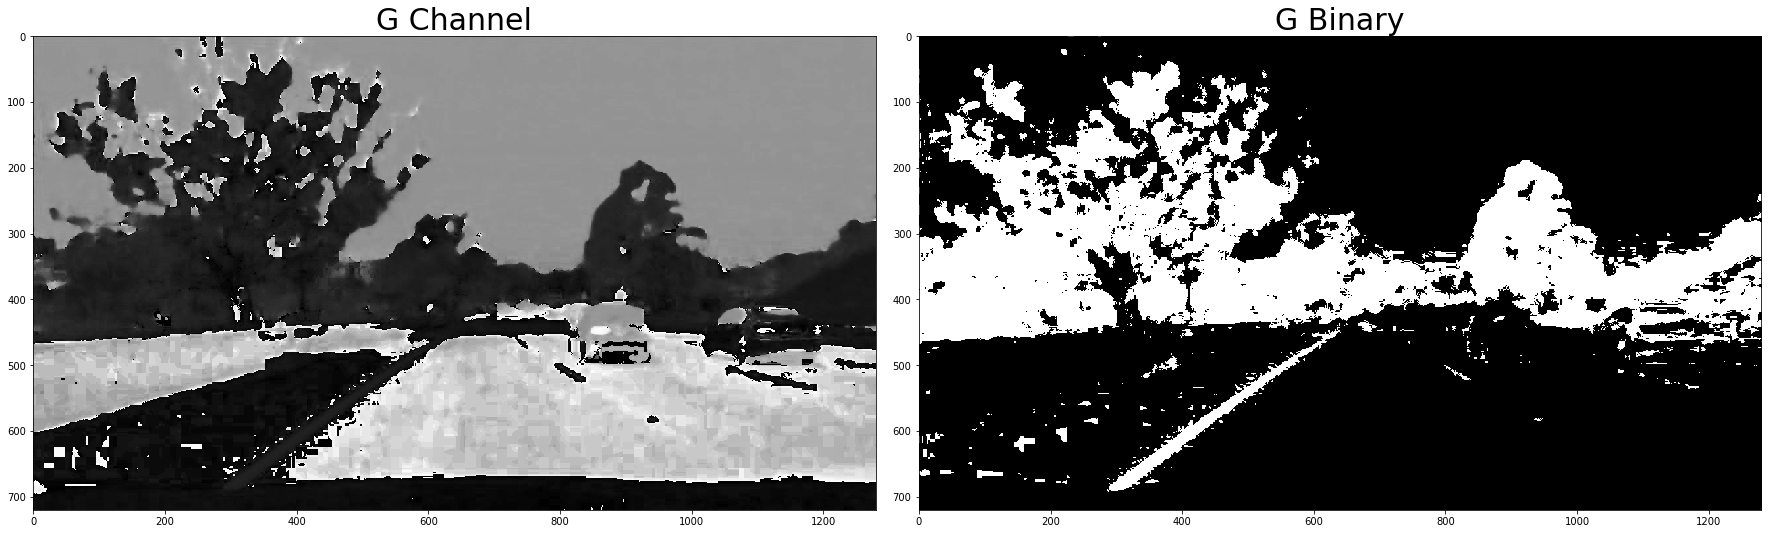

In [44]:
thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(H, cmap='gray')
ax1.set_title('H Channel', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('H Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

From these examples, you can see that the S channel is probably your best bet. It's cleaner than the H channel result and a bit better than the R channel or simple grayscaling. But it's not clear that one method is far superior to the others.

In each case, I've tweaked the threshold parameters to do as good a job as possible of picking out the lines. Where we can really see a difference in results, however, is when we step to a new frame, where there are shadows and different colors in the pavement.

Look at the same thresholds applied to each of these four channels for this image:
![](test4.jpg)

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

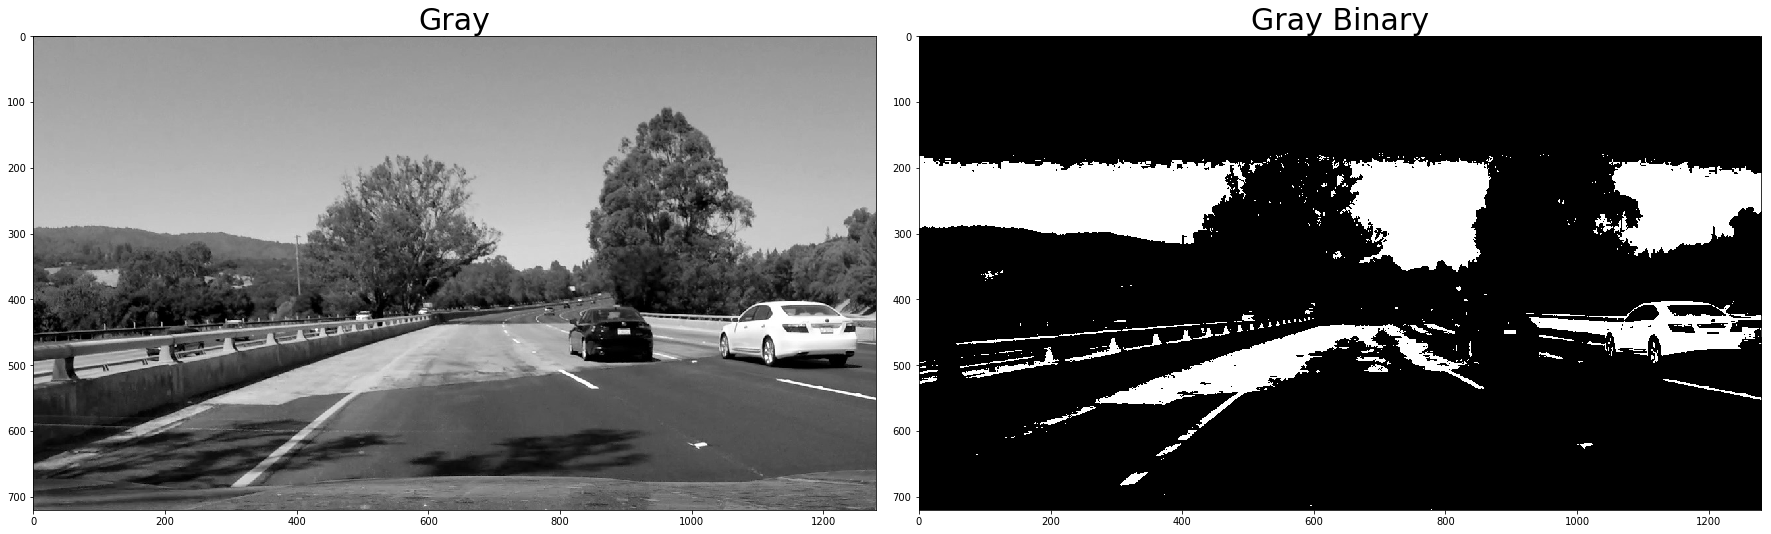

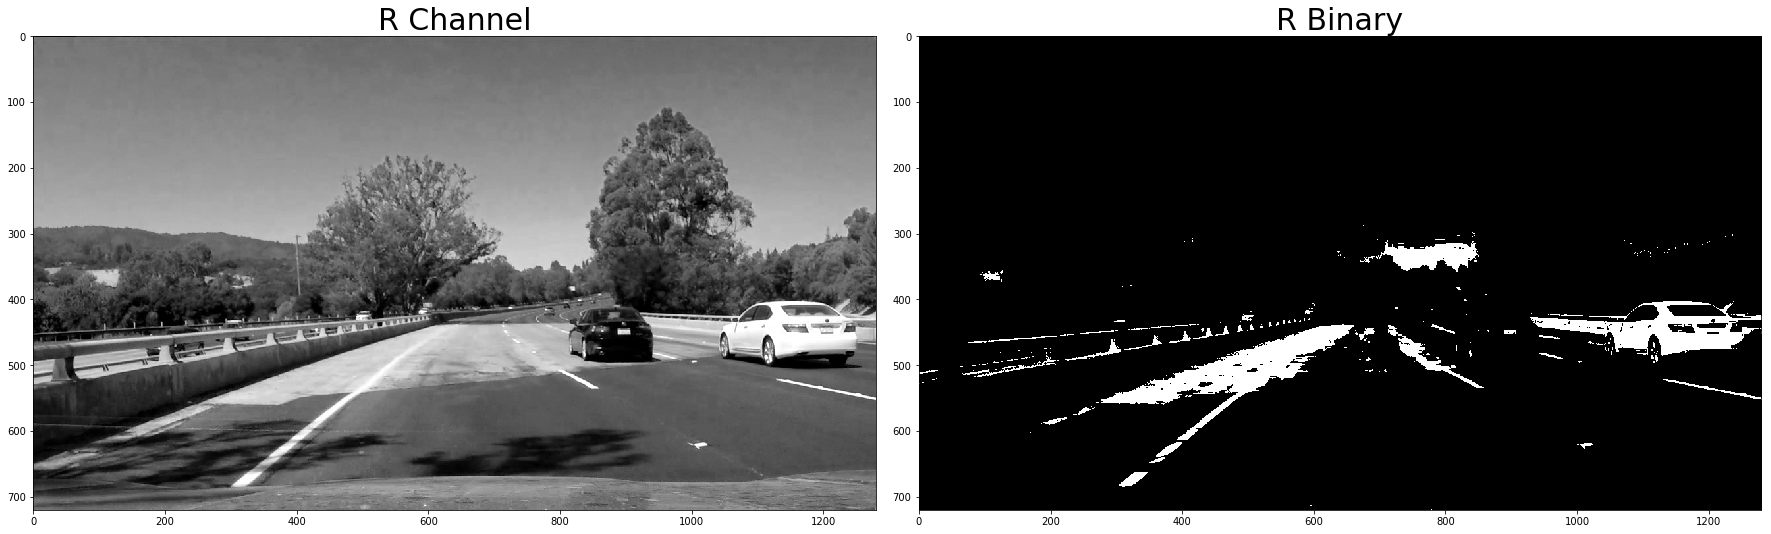

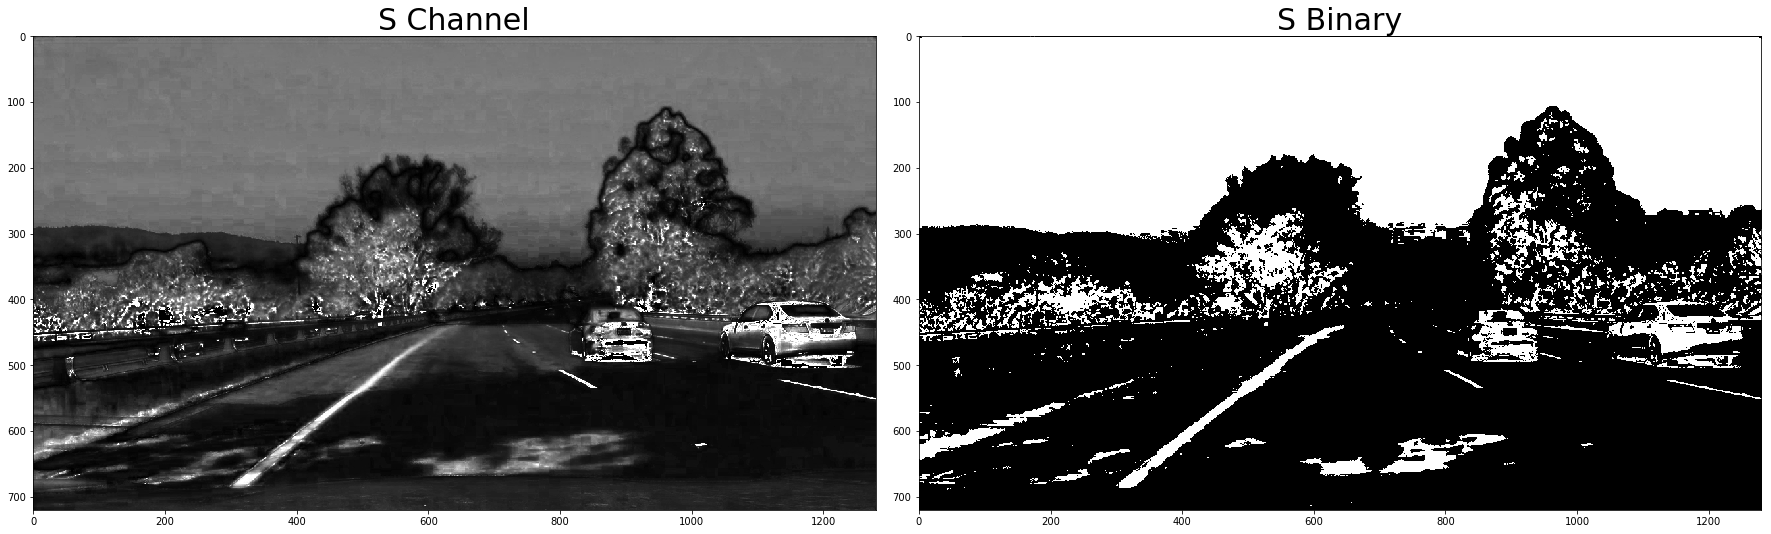

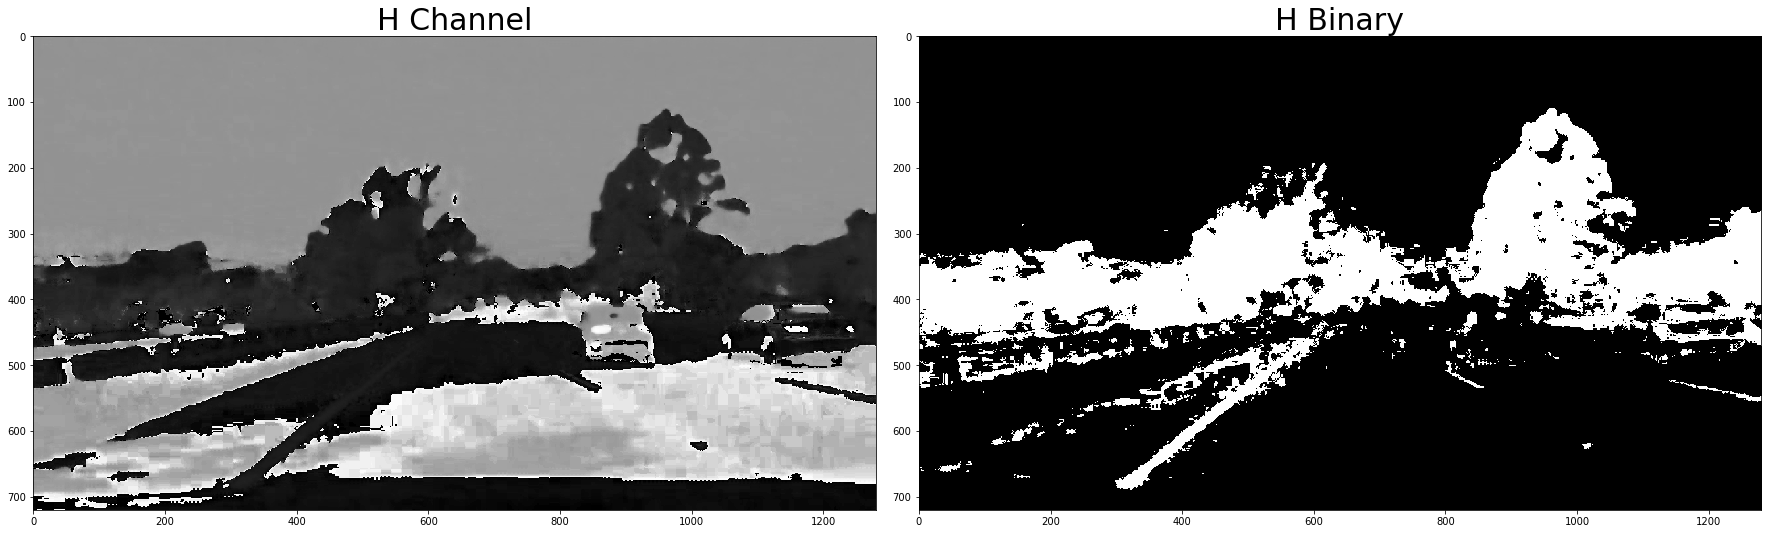

In [5]:
image = mpimg.imread('test4.jpg')

#Gray
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gray, cmap='gray')
ax1.set_title('Gray', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Gray Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#RGB
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(R, cmap='gray')
ax1.set_title('R Channel', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('R Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#HLS
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

#S
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(S, cmap='gray')
ax1.set_title('S Channel', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('S Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

#H
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(H, cmap='gray')
ax1.set_title('H Channel', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('H Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


Now you can see that, the **S channel** is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

It's worth noting, however, that the **R channel** still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.

### 8.HLS Color Threshold
![](./img/hls-binary.jpg)

In this exercise, you can try applying a color threshold in the HLS color space. If you have any problems with the implementation, please refer to the previous video and instructor notes.

Your task here is to write a function that takes in an image and threshold values and returns a binary output from applying the threshold to the S-channel. Apply your thresholds as you did for gradients but this time use an exclusive (`>`) lower bound and an inclusive upper bound (`<=`).

You can download the test images in the quiz for local usage [here](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/files/Advanced_Lane_Finding_Images/color_spaces/colorspace_test_images.zip).

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
# TODO: Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    S = hls[:,:,2]
    binary_output = np.zeros_like(S)
    binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
#     binary_output = np.copy(img) # placeholder line
    return binary_output
    

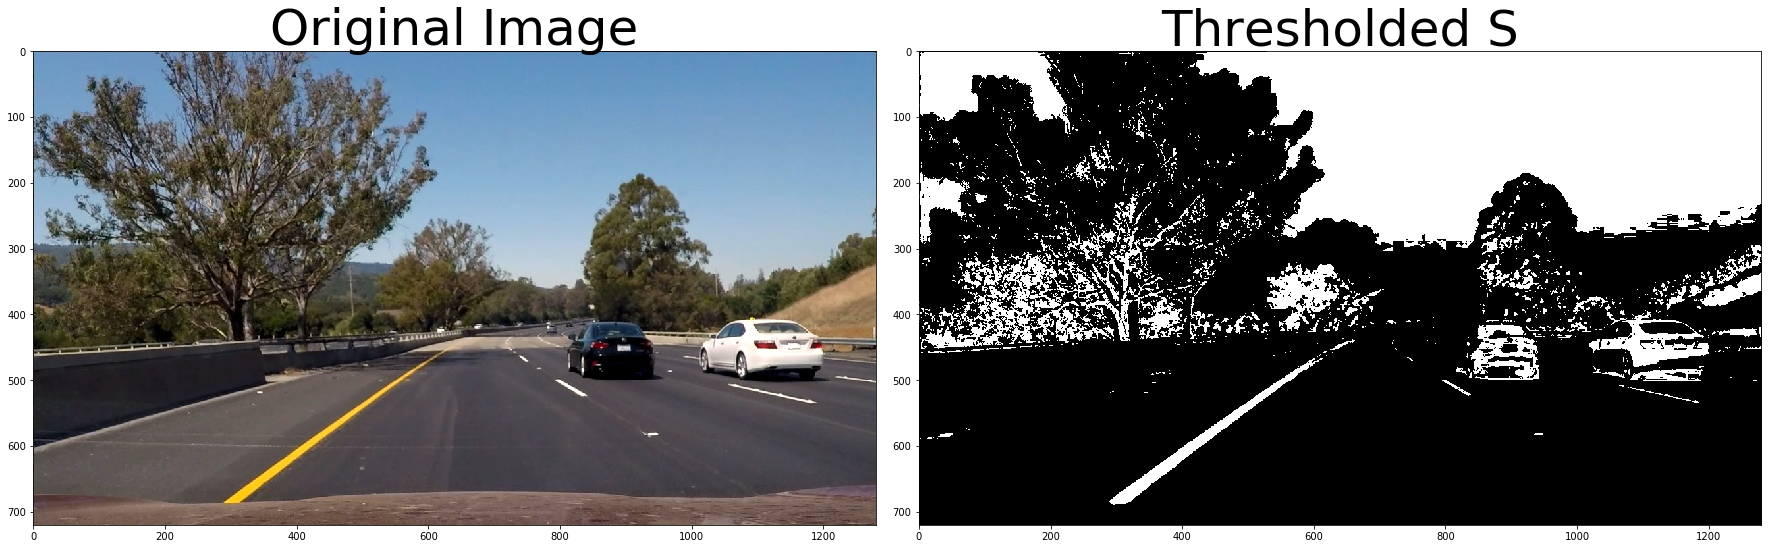

In [6]:
# Read in an image, you can also try test1.jpg or test4.jpg
img = mpimg.imread('test6.jpg') 

# Optional TODO - tune the threshold to try to match the above image!    
hls_binary = hls_select(img, thresh=(90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### 9.Color and Gradient
Now it's time to combine what you know about color and gradient thresholding to get the best of both worlds. Here's an example of how that might look:
![Combined color and gradient thresholds for lane detection](./img/color_and_gradient_example.png)

At this point, it's okay to detect edges around trees or cars because these lines can be mostly filtered out by applying a mask to the image and essentially cropping out the area outside of the lane lines. It's most important that you reliably detect different colors of lane lines under varying degrees of daylight and shadow.

You can clearly see which parts of the lane lines were detected by the gradient threshold and which parts were detected by the color threshold by stacking the channels and seeing the individual components. You can create a binary combination of these two images to map out where either the color or gradient thresholds were met.

Here's what that looks like in code:

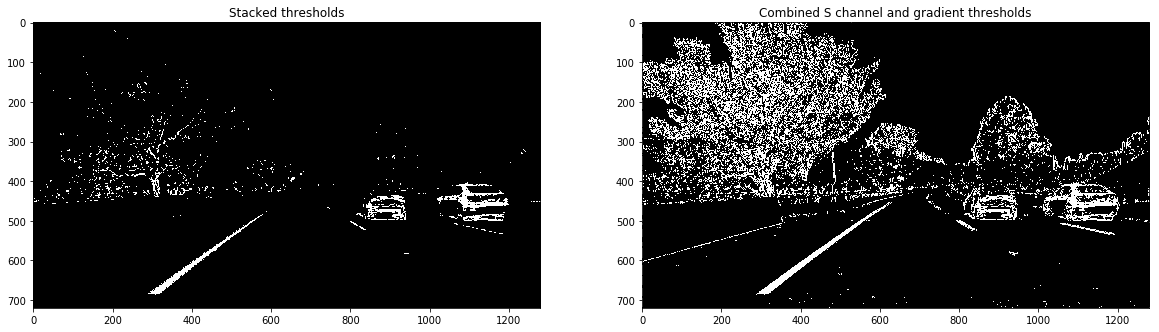

In [21]:
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
# ax1.imshow(color_binary)
ax1.imshow(s_binary, cmap='gray')
ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')


The output is shown below. The final image color_binary is a combination of binary thresholding the S channel (HLS) and binary thresholding the result of applying the Sobel operator in the x direction on the original image.
![](./img/color_and_gradient_example2.png)

(Left) Stacked image; the green is the gradient threshold component and the blue is the color channel threshold component. (Right) black and white combined thresholded image - this one has combined both gradient and color thresholds into one image

In this next exercise, you'll get the chance to play around with different combinations of color and gradient with the goal using the pipeline you come up with for your upcoming project. There's no correct submission, just explore!

Some interesting things to explore might include: the H channel, different threshold values for color and gradient binary images, and even a different color space, like HSV!

You can download the image used in the quiz [here](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/files/Advanced_Lane_Finding_Images/luv_example/bridge_shadow.jpg).


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    

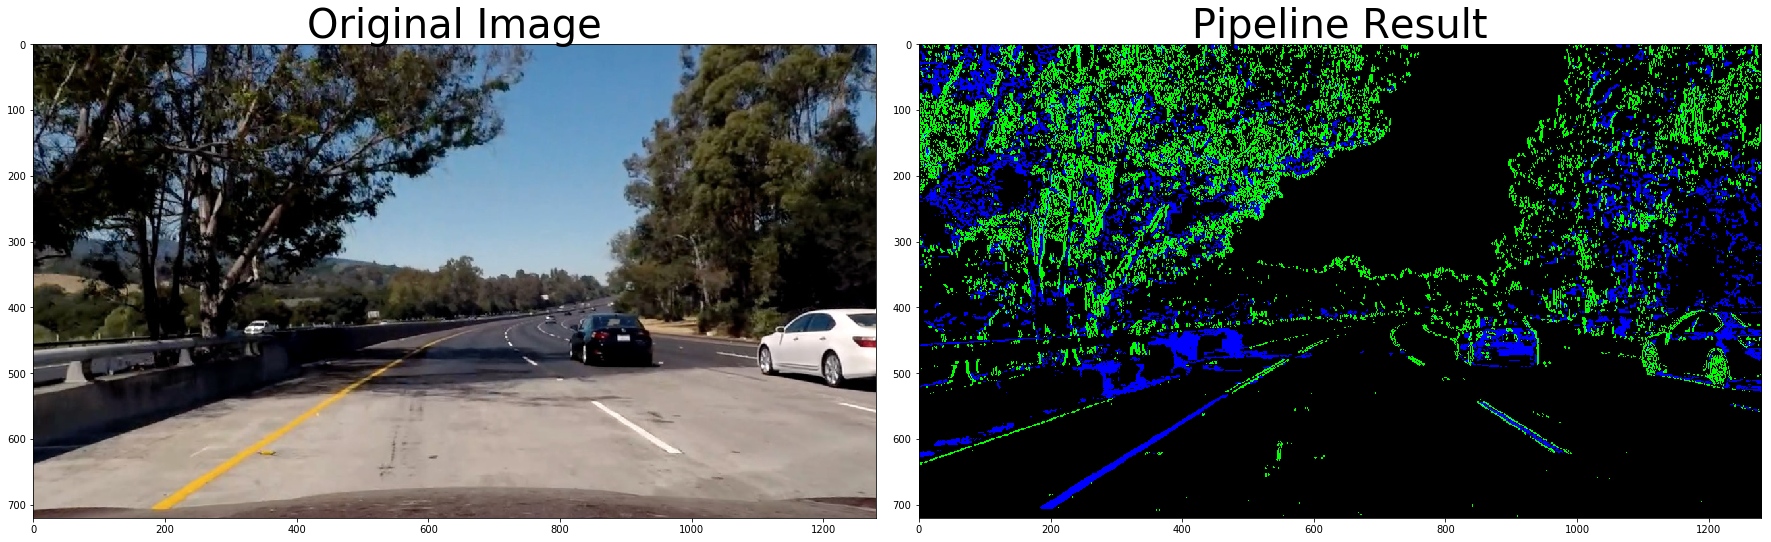

In [4]:
image = mpimg.imread('bridge_shadow.jpg')

result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
